In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
import pickle
import warnings
import numpy as np

In [3]:
# Load your dataset
df = pd.read_excel('Mental disorder symptoms.xlsx')

In [4]:
# Define features and target
X = df.drop('Disorder', axis=1)
y = df['Disorder']

In [5]:
X.columns

Index(['Age', 'Nervous', 'Panic', 'Rapid_breathing', 'Excessive_Sweat',
       'Trouble_task', 'Trouble_sleeping', 'Trouble_work', 'Hopeless', 'Angry',
       'Over_react', 'Eating_pattern', 'Suicidal', 'Tired', 'Close_friends',
       'Social_media', 'Weight', 'Introvert', 'Stressful_memory', 'Nightmare',
       'Avoid', 'Feeling_negative', 'Trouble_concentrating', 'Blame_yourself',
       'Hallucinations', 'Repetitive_behavior', 'Seasonal_depression',
       'Increase_energy'],
      dtype='object')

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train models
warnings.filterwarnings("ignore")
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [8]:
# Train and evaluate models on the test set
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

In [9]:
# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

In [11]:
# Evaluating each model with cross-validation
for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = {metric: cross_val_score(model, X, y, cv=cv, scoring=scoring[metric]) for metric in scoring}
    for metric in scores:
        print(f"{metric.capitalize()}: {np.mean(scores[metric]):.4f} (+/- {np.std(scores[metric]):.4f})")
    print("\n")

Evaluating Logistic Regression...
Accuracy: 0.8245 (+/- 0.0338)
Precision: 0.8297 (+/- 0.0352)
Recall: 0.8245 (+/- 0.0338)
F1: 0.8218 (+/- 0.0352)


Evaluating Decision Tree...
Accuracy: 0.7432 (+/- 0.0306)
Precision: 0.7526 (+/- 0.0264)
Recall: 0.7432 (+/- 0.0306)
F1: 0.7412 (+/- 0.0277)


Evaluating Random Forest...
Accuracy: 0.8163 (+/- 0.0389)
Precision: 0.8630 (+/- 0.0254)
Recall: 0.8163 (+/- 0.0389)
F1: 0.8189 (+/- 0.0384)


Evaluating Gradient Boosting...
Accuracy: 0.8520 (+/- 0.0317)
Precision: 0.8586 (+/- 0.0276)
Recall: 0.8520 (+/- 0.0317)
F1: 0.8486 (+/- 0.0331)




In [12]:
for name, model in models.items():
    print(confusion_matrix(y_test, y_pred))

[[19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  7  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  1 11  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0 36  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  2  0]
 [ 1  0  0  0  0  1  0 29  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  1  0  0  0  0  0  0  0  6  2  0]
 [ 0  0  0  0  0  1  0  3  0  0  0 24  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  3]]
[[19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  7  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  1 11  0  1  0  0  0  0  2  0]
 [ 0  0  0  0  0 36  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  2  0]
 [ 1  0  0  0  0  1  0 29  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  1  0  0  0  0  0  0  0  

In [13]:
# Example usage of the prediction function
example = [[29,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0]]
for model_name, model in models.items():
    y_pred = model.predict(example)
    print(f"{model_name}: {y_pred}")

print("------------------------------")
example2 = [[24,0,2,0,0,2,0,2,0,0,2,0,0,0,0,0,0,2,0,0,2,0,2,0,0,2,0,2]]
for model_name, model in models.items():
    y_pred = model.predict(example2)
    print(f"{model_name}: {y_pred}")

print("------------------------------")
#example3 = [[29,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]]
#for model_name, model in models.items():
    #y_pred = model.predict(example3)
    #print(f"{model_name}: {y_pred}")

Logistic Regression: ['Generalized Anxiety Disorder (GAD)']
Decision Tree: ['Borderline Personality Disorder (BPD)']
Random Forest: ['Generalized Anxiety Disorder (GAD)']
Gradient Boosting: ['Generalized Anxiety Disorder (GAD)']
------------------------------
Logistic Regression: ['Obsessive-Compulsive Disorder (OCD)']
Decision Tree: ['Obsessive-Compulsive Disorder (OCD)']
Random Forest: ['Obsessive-Compulsive Disorder (OCD)']
Gradient Boosting: ['Obsessive-Compulsive Disorder (OCD)']
------------------------------


In [14]:
## Save the trained models using pickle
for model_name, model in models.items():
    with open(f'{model_name.replace(" ", "_").lower()}_model.pkl', 'wb') as file:
        pickle.dump(model, file)
        print(f"{model_name} model saved as {model_name.replace(' ', '_').lower()}_model.pkl")

Logistic Regression model saved as logistic_regression_model.pkl
Decision Tree model saved as decision_tree_model.pkl
Random Forest model saved as random_forest_model.pkl
Gradient Boosting model saved as gradient_boosting_model.pkl


# Hypothesis Testing

In [31]:
data=df
data.Disorder.unique()

array(['Major Depressive Disorder (Depression)',
       'Obsessive-Compulsive Disorder (OCD)', 'Social Anxiety Disorder',
       'Bipolar Disorder', 'Panic Disorder',
       'Borderline Personality Disorder (BPD)',
       'Generalized Anxiety Disorder (GAD)',
       'Attention-Deficit/Hyperactivity Disorder (ADHD)',
       'Post-Traumatic Stress Disorder (PTSD)',
       "We're glad to inform you that you are perfectly alright! It's always good to check in on your well-being, and it's great to see that you are feeling well. Remember to take care of yourself and maintain a healthy lifestyle",
       'Schizophrenia',
       "We understand that you may be experiencing a range of symptoms that can be concerning. It's important to prioritize your health and well-being. We kindly suggest that you visit your nearest hospital or healthcare provider for a comprehensive evaluation and support. Your safety is our priority, and seeking professional help can make a significant difference.",
       '

In [38]:
# Correct spelling mistakes
data.Disorder = df.Disorder.str.replace("We're glad to inform you that you are perfectly alright! It's always good to check in on your well-being, and it's great to see that you are feeling well. Remember to take care of yourself and maintain a healthy lifestyle", 'No_disorder')
data.Disorder = df.Disorder.str.replace("We understand that you may be experiencing a range of symptoms that can be concerning. It's important to prioritize your health and well-being. We kindly suggest that you visit your nearest hospital or healthcare provider for a comprehensive evaluation and support. Your safety is our priority, and seeking professional help can make a significant difference.",'all_symptoms')
data.Disorder = df.Disorder.str.replace("Generalized Anxiety Disorder (GAD)","GAD")
data.Disorder = df.Disorder.str.replace("Obsessive-Compulsive Disorder (OCD)","OCD")
data.Disorder = df.Disorder.str.replace("Social Anxiety Disorder","Social AD")
data.Disorder = df.Disorder.str.replace("Bipolar Disorder","BD")
data.Disorder = df.Disorder.str.replace("Attention-Deficit/Hyperactivity Disorder (ADHD)","ADHD")
data.Disorder = df.Disorder.str.replace("Seasonal Affective Disorder (SAD)","SAD")
data.Disorder = df.Disorder.str.replace("Major Depressive Disorder (Depression)","MDD")
data.Disorder = df.Disorder.str.replace("Post-Traumatic Stress Disorder (PTSD)","PTSD")
data.Disorder = df.Disorder.str.replace("Borderline Personality Disorder (BPD)","BPD")

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Hypothesis 1: Younger individuals are more likely to report feeling nervous or experience panic attacks compared to older individuals.

  Age Group  Total_Count  Nervous_Reported  Panic_Reported  \
0     Older          242               143             144   
1   Younger          852               538             320   

   Nervous_Percentage  Panic_Percentage  
0           59.090909         59.504132  
1           63.145540         37.558685  

Interpretation of Results:
Older individuals: 242 total, Nervous reported: 143 (59.09%), Panic reported: 144 (59.50%)
Younger individuals: 852 total, Nervous reported: 538 (63.15%), Panic reported: 320 (37.56%)


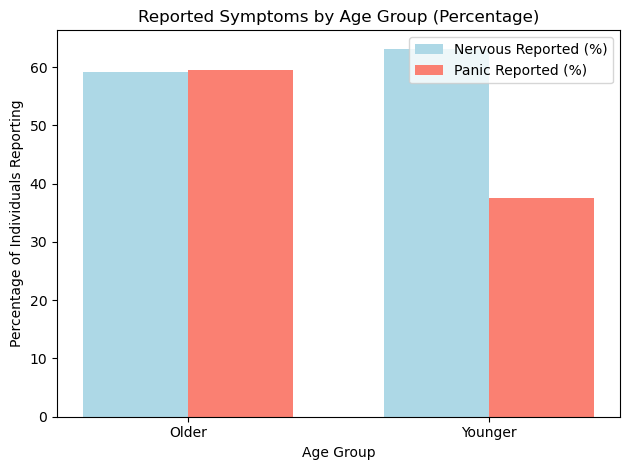

In [35]:
# Define age groups
def age_group(age):
    return 'Younger' if age < 30 else 'Older'

# Apply age grouping
df['Age Group'] = df['Age'].apply(age_group)

# Convert symptoms to numerical values for analysis
# Assuming 'Nervous' and 'Panic' are coded as 0, 1, 2
# Create a new column to indicate reported symptoms (1 or 2 means reported)
for symptom in ['Nervous', 'Panic']:
    df[symptom + ' Reported'] = df[symptom].apply(lambda x: 1 if x in [1, 2] else 0)

# Calculate total counts and reported counts by age group
summary = df.groupby('Age Group').agg(
    Total_Count=('Age', 'count'),
    Nervous_Reported=('Nervous Reported', 'sum'),
    Panic_Reported=('Panic Reported', 'sum')
).reset_index()

# Calculate percentages
summary['Nervous_Percentage'] = (summary['Nervous_Reported'] / summary['Total_Count']) * 100
summary['Panic_Percentage'] = (summary['Panic_Reported'] / summary['Total_Count']) * 100

# Output the summary
print(summary)

# Interpretation
print("\nInterpretation of Results:")
for index, row in summary.iterrows():
    print(f"{row['Age Group']} individuals: {row['Total_Count']} total, "
          f"Nervous reported: {row['Nervous_Reported']} ({row['Nervous_Percentage']:.2f}%), "
          f"Panic reported: {row['Panic_Reported']} ({row['Panic_Percentage']:.2f}%)")

# Create bar charts for visualization based on percentages
labels = summary['Age Group']
nervous_percentages = summary['Nervous_Percentage']
panic_percentages = summary['Panic_Percentage']

x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x, nervous_percentages, width, label='Nervous Reported (%)', color='lightblue')
bars2 = ax.bar([p + width for p in x], panic_percentages, width, label='Panic Reported (%)', color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Percentage of Individuals Reporting')
ax.set_title('Reported Symptoms by Age Group (Percentage)')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Hypothesis 2: Individuals who have trouble concentrating are also likely to report trouble sleeping.


Summary of Symptoms Reporting:
Total Individuals: 1094
Individuals reporting both trouble concentrating and sleeping: 356 (32.54%)


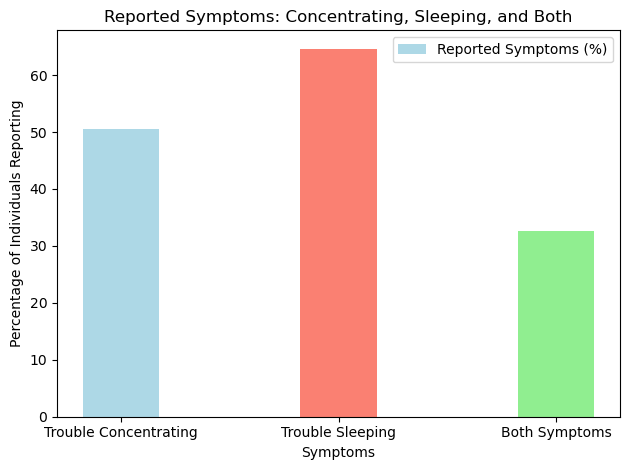

In [27]:
# Convert symptoms to binary values for analysis
# Assuming 'Trouble_Concentrating' and 'Trouble_Sleeping' are coded as 0, 1, 2
df['Concentration Reported'] = df['Trouble_concentrating'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Sleep Reported'] = df['Trouble_sleeping'].apply(lambda x: 1 if x in [1, 2] else 0)

# Calculate total individuals
total_count = len(df)

# Calculate the number of individuals who reported both symptoms
both_reported = df[(df['Concentration Reported'] == 1) & (df['Sleep Reported'] == 1)]

# Calculate the percentage of individuals who reported both symptoms
both_percentage = (len(both_reported) / total_count) * 100

# Output the results
print("\nSummary of Symptoms Reporting:")
print(f"Total Individuals: {total_count}")
print(f"Individuals reporting both trouble concentrating and sleeping: {len(both_reported)} ({both_percentage:.2f}%)")

# Create a bar chart for visualization of both reported symptoms
labels = ['Trouble Concentrating', 'Trouble Sleeping', 'Both Symptoms']
concentration_percentage = (df['Concentration Reported'].sum() / total_count) * 100
sleep_percentage = (df['Sleep Reported'].sum() / total_count) * 100

percentages = [concentration_percentage, sleep_percentage, both_percentage]

x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars = ax.bar(x, percentages, width, label='Reported Symptoms (%)', color=['lightblue', 'salmon', 'lightgreen'])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Symptoms')
ax.set_ylabel('Percentage of Individuals Reporting')
ax.set_title('Reported Symptoms: Concentrating, Sleeping, and Both')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Hypothesis 3: Individuals who are having trouble with work are more likely to feel hopeless and tired.


Summary of Symptoms Reporting:
Total Individuals: 1094
Individuals reporting trouble with work: 489
Among those, individuals feeling hopeless: 274 (56.03%)
Among those, individuals feeling tired: 306 (62.58%)


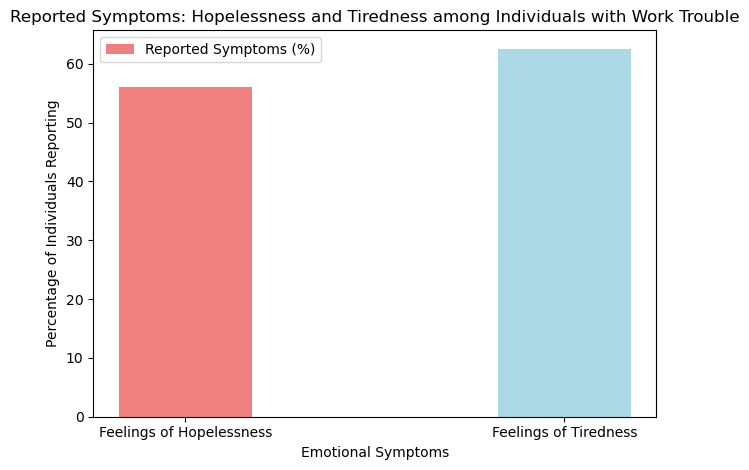

In [33]:
# Convert symptoms to binary values for analysis
# Assuming 'Trouble_With_Work', 'Feelings_Hopelessness', and 'Feelings_Tired' are coded as 0, 1, 2
df['Work Trouble Reported'] = df['Trouble_work'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Hopelessness Reported'] = df['Hopeless'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Tiredness Reported'] = df['Tired'].apply(lambda x: 1 if x in [1, 2] else 0)

# Calculate total individuals
total_count = len(df)

# Calculate the number of individuals who reported having trouble with work, hopelessness, and tiredness
work_trouble = df[df['Work Trouble Reported'] == 1]
hopelessness_reported = work_trouble['Hopelessness Reported'].sum()
tiredness_reported = work_trouble['Tiredness Reported'].sum()

# Calculate the percentages
hopelessness_percentage = (hopelessness_reported / len(work_trouble)) * 100 if len(work_trouble) > 0 else 0
tiredness_percentage = (tiredness_reported / len(work_trouble)) * 100 if len(work_trouble) > 0 else 0

# Output the results
print("\nSummary of Symptoms Reporting:")
print(f"Total Individuals: {total_count}")
print(f"Individuals reporting trouble with work: {len(work_trouble)}")
print(f"Among those, individuals feeling hopeless: {hopelessness_reported} ({hopelessness_percentage:.2f}%)")
print(f"Among those, individuals feeling tired: {tiredness_reported} ({tiredness_percentage:.2f}%)")

# Create a bar chart for visualization of hopelessness and tiredness among those with work trouble
labels = ['Feelings of Hopelessness', 'Feelings of Tiredness']
percentages = [hopelessness_percentage, tiredness_percentage]

x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars = ax.bar(x, percentages, width, label='Reported Symptoms (%)', color=['lightcoral', 'lightblue'])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Emotional Symptoms')
ax.set_ylabel('Percentage of Individuals Reporting')
ax.set_title('Reported Symptoms: Hopelessness and Tiredness among Individuals with Work Trouble')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Hypothesis 4: People who feel hopeless are more prone to feelings of anger and overreacting in situations.


Summary of Symptoms Reporting:
Total Individuals: 1094
Individuals reporting feelings of hopelessness: 431
Among those, individuals feeling angry: 263 (61.02%)
Among those, individuals who tend to overreact: 221 (51.28%)


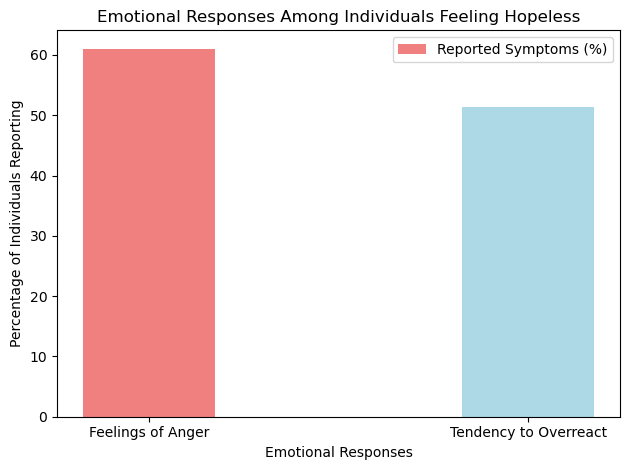

In [35]:
# Convert symptoms to binary values for analysis
df['Hopelessness Reported'] = df['Hopeless'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Anger Reported'] = df['Angry'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Overreaction Reported'] = df['Over_react'].apply(lambda x: 1 if x in [1, 2] else 0)

# Calculate total individuals
total_count = len(df)

# Calculate the number of individuals who reported hopelessness, anger, and overreaction
hopelessness_group = df[df['Hopelessness Reported'] == 1]
anger_reported = hopelessness_group['Anger Reported'].sum()
overreaction_reported = hopelessness_group['Overreaction Reported'].sum()

# Calculate the percentages
anger_percentage = (anger_reported / len(hopelessness_group)) * 100 if len(hopelessness_group) > 0 else 0
overreaction_percentage = (overreaction_reported / len(hopelessness_group)) * 100 if len(hopelessness_group) > 0 else 0

# Output the results
print("\nSummary of Symptoms Reporting:")
print(f"Total Individuals: {total_count}")
print(f"Individuals reporting feelings of hopelessness: {len(hopelessness_group)}")
print(f"Among those, individuals feeling angry: {anger_reported} ({anger_percentage:.2f}%)")
print(f"Among those, individuals who tend to overreact: {overreaction_reported} ({overreaction_percentage:.2f}%)")

# Create a bar chart for visualization
labels = ['Feelings of Anger', 'Tendency to Overreact']
percentages = [anger_percentage, overreaction_percentage]

x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars = ax.bar(x, percentages, width, label='Reported Symptoms (%)', color=['lightcoral', 'lightblue'])
# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Emotional Responses')
ax.set_ylabel('Percentage of Individuals Reporting')
ax.set_title('Emotional Responses Among Individuals Feeling Hopeless')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Hypothesis 5: Introverts are more likely to avoid social activities and report addicted to social media.


Summary of Symptoms Reporting:
Total Individuals: 1094
Individuals identified as introverts: 446
Among those, individuals avoiding social activities: 311 (69.73%)
Among those, individuals reporting social media addiction: 309 (69.28%)


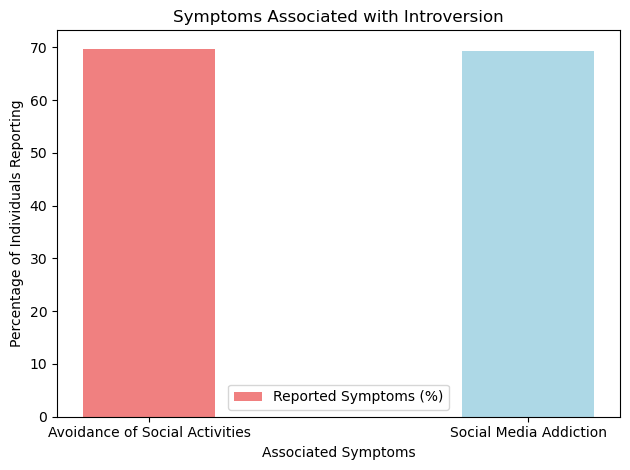

In [37]:
df['Introvert Reported'] = df['Introvert'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Avoidance Reported'] = df['Avoid'].apply(lambda x: 1 if x in [1, 2] else 0)
df['Addiction Reported'] = df['Social_media'].apply(lambda x: 1 if x in [1, 2] else 0)

# Calculate total individuals
total_count = len(df)

# Calculate the number of individuals who reported introversion, avoidance, and addiction
introvert_group = df[df['Introvert Reported'] == 1]
avoidance_reported = introvert_group['Avoidance Reported'].sum()
addiction_reported = introvert_group['Addiction Reported'].sum()

# Calculate the percentages
avoidance_percentage = (avoidance_reported / len(introvert_group)) * 100 if len(introvert_group) > 0 else 0
addiction_percentage = (addiction_reported / len(introvert_group)) * 100 if len(introvert_group) > 0 else 0

# Output the results
print("\nSummary of Symptoms Reporting:")
print(f"Total Individuals: {total_count}")
print(f"Individuals identified as introverts: {len(introvert_group)}")
print(f"Among those, individuals avoiding social activities: {avoidance_reported} ({avoidance_percentage:.2f}%)")
print(f"Among those, individuals reporting social media addiction: {addiction_reported} ({addiction_percentage:.2f}%)")

# Create a bar chart for visualization
labels = ['Avoidance of Social Activities', 'Social Media Addiction']
percentages = [avoidance_percentage, addiction_percentage]

x = range(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
bars = ax.bar(x, percentages, width, label='Reported Symptoms (%)', color=['lightcoral', 'lightblue'])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Associated Symptoms')
ax.set_ylabel('Percentage of Individuals Reporting')
ax.set_title('Symptoms Associated with Introversion')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()